<a href="https://colab.research.google.com/github/vicabc/sloan-DR14/blob/main/transforma%C3%A7ao_coordenadas_galacticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
sloan= pd.read_csv('/content/sloan10')

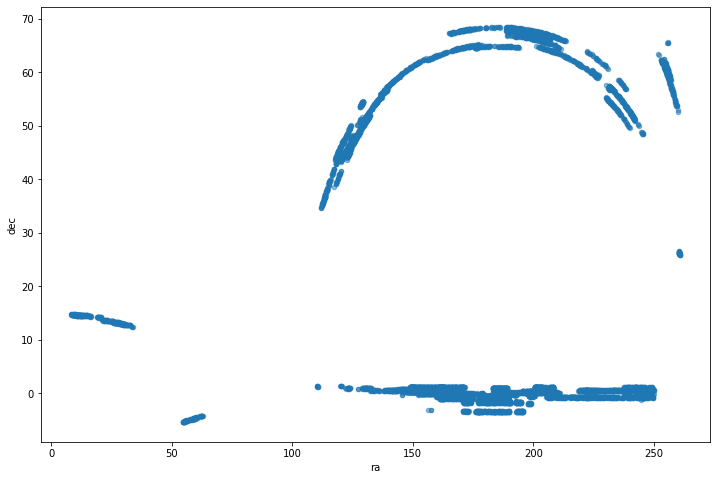

In [6]:
#ANALISAMOS AS CORRELAÇÕES no mapa 2D da ascensão reta e da declinação
plt.rcParams["figure.figsize"] = (12, 8)
sloan.plot(kind="scatter",x="ra",y="dec",alpha=0.5)

In [7]:
# importar bibliotecas astropy para fazer a transformação de coordenadas
from astropy import units as u
from astropy.coordinates import SkyCoord

In [8]:
sloan.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [9]:
#criamos um espaço para os dados variando entre o min e o max 
ra1= np.arange(8,2670,0.1)
dec1= np.arange(-5,70,0.1)

In [10]:
ra1 = sloan['ra']
dec1 = sloan['dec']
teste=SkyCoord(ra1*u.deg,dec1*u.deg,frame='icrs')
teste

<SkyCoord (ICRS): (ra, dec) in deg
    [(183.5313257,  0.08969303), (183.5983705,  0.13528503),
     (183.6802074,  0.12618509), ..., (131.5525623, 51.66698638),
     (131.4771511, 51.75306779), (131.6650121, 51.80530747)]>

In [11]:
#transformamos nossos dados ra,dec para coordenadas galacticas
teste_gal=teste.galactic
teste_gal

<SkyCoord (Galactic): (l, b) in deg
    [(283.06446052, 61.51377155), (283.1697501 , 61.57746596),
     (283.33955742, 61.59330901), ..., (166.98590569, 38.51405026),
     (166.88017699, 38.46166128), (166.80335603, 38.57402371)]>

In [12]:
#criamos uma nova variavel q contenha todos os dados transformados
ra2 = teste_gal.l
dec2 = teste_gal.b

In [13]:
sloan['l']= ra2
sloan['b']=dec2
sloan['teste']=1

In [14]:
bstar=sloan['b'][sloan['class']=='STAR'].values
lstar=sloan['l'][sloan['class']=='STAR'].values

bqso=sloan['b'][sloan['class']=='QSO'].values
lqso=sloan['l'][sloan['class']=='QSO'].values

bgal=sloan['b'][sloan['class']=='GALAXY'].values
lgal=sloan['l'][sloan['class']=='GALAXY'].values

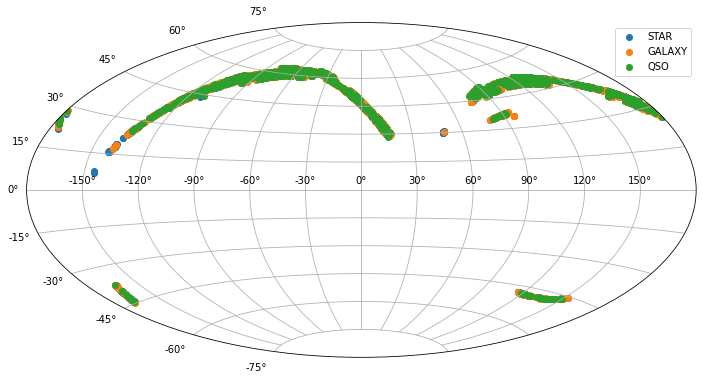

In [15]:
plt.subplot(111, projection='aitoff')
plt.grid(True)

plt.scatter(lstar.wrap_at('180d').radian, bstar.radian)
plt.scatter(lgal.wrap_at('180d').radian, bgal.radian)
plt.scatter(lqso.wrap_at('180d').radian, bqso.radian)

plt.legend(('STAR', 'GALAXY', 'QSO'))